## Supervised Learning: Challenge

During this challenge, we will be working on the credit card fraud prediction. Available to download [here](https://drive.google.com/file/d/102F1yO4uhUZ-TONJheSiXYWUgBDCoIjA/view?usp=sharing). The data is originally from [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

> #### Warning
> There is a huge class imbalance ratio so we need to be careful when evaluating. It might be better to use method `.predict_proba()` with custom cut-off to search for fraudelent transactions.

In [1]:
import pandas as pd

In [55]:
df = pd.read_csv('./data/creditcard.csv')

In [56]:
x,y = df.iloc[:,:-1], df.Class

In [57]:
import scipy.stats as stats

print(x[y==0]['Amount'].mean())
print(x[y==1]['Amount'].mean())
stats.ttest_ind(x[y==0]['Amount'],x[y==1]['Amount'])

88.29102242225574
122.21132113821133


Ttest_indResult(statistic=-3.00555231397141, pvalue=0.002651220649191683)

In [63]:
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
"""

"\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\namount = df['Amount'].values\ndf['Amount'] = sc.fit_transform(amount.reshape(-1, 1))\n"

In [64]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0, stratify=y)
print((y_test==0).sum()/len(y_test))
print((y_train==0).sum()/len(y_train))
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

0.9982678510820079
0.9982745129511847


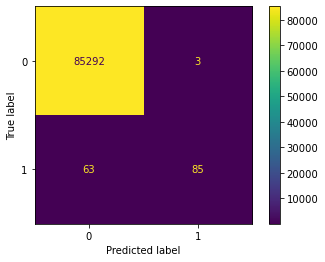

In [76]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
clf = svm.SVC(probability=True)
clf.fit(x_train,y_train)
plot_confusion_matrix(clf,x_test,y_test)

In [75]:
y_pred = clf.predict_proba(x_test)

AttributeError: predict_proba is not available when  probability=False

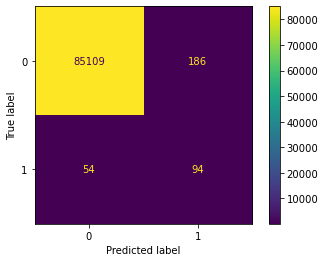

In [70]:
clf = svm.SVC(class_weight="balanced")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
plot_confusion_matrix(clf,x_test,y_test)

In [ ]:
clf = svm.SVC(gamma="auto",class_weight="balanced")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
plot_confusion_matrix(clf,x_test,y_test)

In [67]:
dir(clf)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predi

In [72]:
clf.C

1.0